In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from aggmo import AggMo

In [17]:
x_init = 1.0
x = tf.Variable(x_init, trainable=True)
h = tf.placeholder(tf.float32)
quad_x = 0.5 * h * x * x

LR=.33
opt = AggMo(LR, [0,0.9,0.99,0.999]).minimize(quad_x)
# opt = AggMo.from_exp_form(LR, a=0.1, K=4).minimize(quad_x)
opt_2 = tf.train.GradientDescentOptimizer(LR).minimize(quad_x)
opt_3 = tf.train.MomentumOptimizer(LR, 0.999).minimize(quad_x)

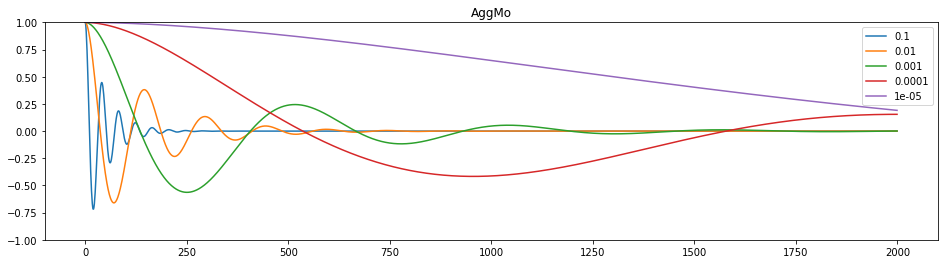

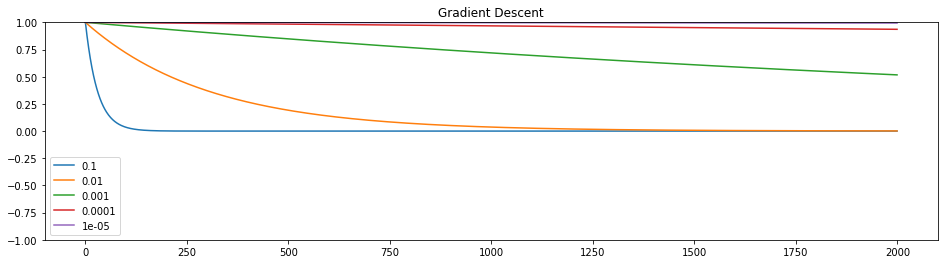

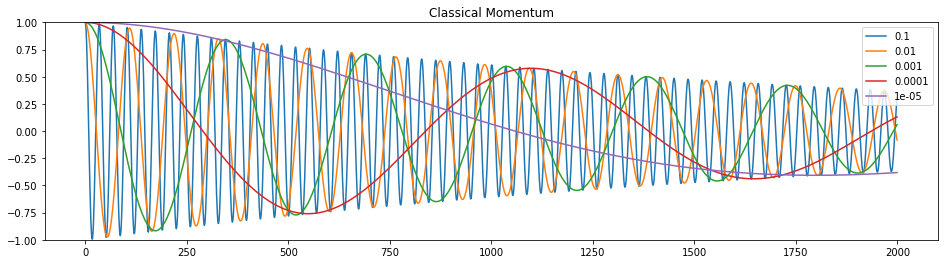

In [19]:
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )

def optimize_quadratic(opt, iters=2000):
    xs = {}
    losses = {}

    with tf.Session() as sess:
        for eig in [0.1, 0.01, 0.001, 0.0001, 0.00001]:
            sess.run(tf.global_variables_initializer())
            x.load(x_init, sess)
            xs[eig] = []
            losses[eig] = []
            for _ in range(iters):
                out = sess.run([x, quad_x], {h: eig})
                xs[eig].append(out[0])
                losses[eig].append(out[1])
                sess.run(opt, {h: eig})
    return xs, losses
        
xs, losses = optimize_quadratic(opt)
plt.figure(figsize=(16,4))
plt.ylim(ymin=-1, ymax=1.0)
for eig, xvals in xs.items():
    plt.plot(xvals, label=eig)
plt.legend()
plt.title('AggMo')
plt.show()

xs, losses = optimize_quadratic(opt_2)
plt.figure(figsize=(16,4))
plt.ylim(ymin=-1, ymax=1.0)
for eig, xvals in xs.items():
    plt.plot(xvals, label=eig)
plt.legend()
plt.title('Gradient Descent')
plt.show()
    
xs, losses = optimize_quadratic(opt_3)
plt.figure(figsize=(16,4))
plt.ylim(ymin=-1, ymax=1.0)
for eig, xvals in xs.items():
    plt.plot(xvals, label=eig)
plt.legend()
plt.title('Classical Momentum')
plt.show()